In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)

In [18]:
# import numpy as np
# def prediction_lin(df, df_expended,column_name):
#     from sklearn import mixture
#     from sklearn.preprocessing import PolynomialFeatures
#     from sklearn.pipeline import make_pipeline
#     from sklearn.linear_model import LinearRegression, BayesianRidge
#     #regr = LinearRegression()
#     from sklearn.ensemble import RandomForestRegressor
#     regr = RandomForestRegressor(max_depth=4)



#     df['months_from_start'] = (df.index - df.index[0])
#     df_expended['months_from_start'] = (df_expended.index - df_expended.index[0])

#     x = df['months_from_start'].values.reshape(-1, 1)
#     y = df[column_name].values
#     regr.fit(x, y)

#     z = df_expended['months_from_start'].values.reshape(-1, 1)

# # Make predictions using the testing set
#     pred = regr.predict(z)
    
#     return pred

In [19]:
# def plot_1(x, y,x_ex, y_pred, name_save):
    
#     plt.scatter(x, y,  color='black',label = 'Measured')
#     plt.plot(x_ex, y_pred, color='blue', linewidth=3,label='Predicted')
#     plt.legend(fontsize = 25)
#     plt.xlabel('Time [year]',fontsize = 25)
#     plt.ylabel('Temperature [F]',fontsize = 25)
#     plt.yticks(fontsize=25)
#     plt.xticks(fontsize=25)
#     #plt.axhline(y=32, color='r', linestyle='-')
#     plt.savefig(name_save+'.png',dpi=400)
    
#     plt.show()
    
    

In [20]:

# predictions_min = prediction_lin(df_min,expended,'min')
# predictions_min_la = prediction_lin(df_min_la,expended_la,'min')

# plot_1(df_min['Date'], df_min['min'], expended['expended date'],predictions_min, 'min_temp')
# plot_1(df_min_la['Date'], df_min_la['min'], expended_la['expended date'],predictions_min_la, 'min_temp')



In [21]:

# predictions_max = prediction_lin(df_max,expended,'max')

# plot_1(df_max['Date'], df_max['max'], expended['expended date'],predictions_max, 'max_temp')

# predictions_max_la = prediction_lin(df_max_la,expended_la,'max')

# plot_1(df_max_la['Date'], df_max_la['max'], expended_la['expended date'],predictions_max_la, 'max_temp')

In [22]:

# predictions = prediction_lin(df,expended_m,'average')
# predictions_la = prediction_lin(df_la,expended_m_la,'average')


# plot_1(df['Date'], df['average'], expended_m['expended date'],predictions, 'average_temp')
# plot_1(df_la['Date'], df_la['average'], expended_m_la['expended date'],predictions_la, 'average_temp')




In [23]:
# plt.scatter(df['Date'], df['average'],  color='black',label = 'Measured Average/m')
# plt.scatter(df_min['Date'], df_min['min'],  color='blue',label = 'Measured Minimum/y')
# plt.scatter(df_max['Date'], df_max['max'],  color='red',label = 'Measured Maximum/y')



# plt.plot(expended_m['expended date'],predictions, color='k', linewidth=3,label='Predicted Average/m')
# plt.plot(expended['expended date'],predictions_min, color='blue', linewidth=3,label='Predicted Minimum/y')
# plt.plot(expended['expended date'],predictions_max, color='red', linewidth=3,label='Predicted Maximum/y')



# plt.legend(fontsize = 25)





# plt.xlabel('Time [year]',fontsize = 25)
# plt.ylabel('Temperature [F]',fontsize = 25)
# plt.yticks(fontsize=25)
# plt.xticks(fontsize=25)
# plt.axhline(y=32, color='k', linestyle='-')
# plt.savefig('3in1.png',dpi=400)
    
# plt.show()

In [24]:
# df_la['average'].describe()

In [25]:
# plt.scatter(df_la['Date'], df_la['average'],  color='black',label = 'Measured Average/m')
# plt.scatter(df_min_la['Date'], df_min_la['min'],  color='blue',label = 'Measured Minimum/y')
# plt.scatter(df_max_la['Date'], df_max_la['max'],  color='red',label = 'Measured Maximum/y')



# plt.plot(expended_m_la['expended date'],predictions_la, color='k', linewidth=3,label='Predicted Average/m')
# plt.plot(expended_la['expended date'],predictions_min_la, color='blue', linewidth=3,label='Predicted Minimum/y')
# plt.plot(expended_la['expended date'],predictions_max_la, color='red', linewidth=3,label='Predicted Maximum/y')



# plt.legend(fontsize = 25)





# plt.xlabel('Time [year]',fontsize = 25)
# plt.ylabel('Temperature [F]',fontsize = 25)
# plt.yticks(fontsize=25)
# plt.xticks(fontsize=25)
# #plt.axhline(y=32, color='k', linestyle='-')
# plt.savefig('3in1_la.png',dpi=400)
    
# plt.show()

In [26]:
# expended_m_2 = expended_m[expended_m['expended date'] > '2000-01-31']
# expended_2 = expended[expended['expended date'] > '2000-01-31']

# expended_m_2_la = expended_m_la[expended_m_la['expended date'] > '2000-01-31']
# expended_2_la = expended_la[expended_la['expended date'] > '2000-01-31']

In [27]:
# df2 = df[df['Date'] >  '2000-01-31']
# df_min2 = df_min[df_min['Date'] > '2000-01-31']
# df_max2 = df_max[df_max['Date'] > '2000-01-31']

# df_la2 = df_la[df_la['Date'] >  '2000-01-31']
# df_min_la2 = df_min_la[df_min_la['Date'] > '2000-01-31']
# df_max_la2 = df_max_la[df_max_la['Date'] > '2000-01-31']

In [28]:
# predictions_max2 = prediction_lin(df_max2,expended_2,'max')
# predictions2 = prediction_lin(df2,expended_m_2,'average')

# predictions_min2 = prediction_lin(df_min,expended_2,'min')


# predictions_max_la2 = prediction_lin(df_max_la2,expended_2_la,'max')
# predictions_la2 = prediction_lin(df_la2,expended_m_2_la,'average')

# predictions_min_la2 = prediction_lin(df_min_la2,expended_2_la,'min')


In [29]:
# plt.scatter(df2['Date'], df2['average'],  color='black',label = 'Measured Average/m')
# plt.scatter(df_min2['Date'], df_min2['min'],  color='blue',label = 'Measured Minimum/y')
# plt.scatter(df_max2['Date'], df_max2['max'],  color='red',label = 'Measured Maximum/y')



# plt.plot(expended_m_2['expended date'],predictions2, color='k', linewidth=3,label='Predicted Average/m')
# plt.plot(expended_2['expended date'],predictions_min2, color='blue', linewidth=3,label='Predicted Minimum/y')
# plt.plot(expended_2['expended date'],predictions_max2, color='red', linewidth=3,label='Predicted Maximum/y')



# plt.legend(fontsize = 25)





# plt.xlabel('Time [year]',fontsize = 25)
# plt.ylabel('Temperature [F]',fontsize = 25)
# plt.yticks(fontsize=25)
# plt.xticks(fontsize=25)
# plt.axhline(y=32, color='cyan', linestyle='-')
# plt.savefig('3in1_zoom.png',dpi=400)
    
# plt.show()

In [30]:
# plt.scatter(df_la2['Date'], df_la2['average'],  color='black',label = 'Measured Average/m')
# plt.scatter(df_min_la2['Date'], df_min_la2['min'],  color='blue',label = 'Measured Minimum/y')
# plt.scatter(df_max_la2['Date'], df_max_la2['max'],  color='red',label = 'Measured Maximum/y')



# plt.plot(expended_m_2_la['expended date'],predictions_la2, color='k', linewidth=3,label='Predicted Average/m')
# plt.plot(expended_2_la['expended date'],predictions_min_la2, color='blue', linewidth=3,label='Predicted Minimum/y')
# plt.plot(expended_2_la['expended date'],predictions_max_la2, color='red', linewidth=3,label='Predicted Maximum/y')



# plt.legend(fontsize = 25)





# plt.xlabel('Time [year]',fontsize = 25)
# plt.ylabel('Temperature [F]',fontsize = 25)
# plt.yticks(fontsize=25)
# plt.xticks(fontsize=25)
# #plt.axhline(y=32, color='cyan', linestyle='-')
# plt.savefig('3in1_zoom_la.png',dpi=400)
    
# plt.show()

In [31]:
# df_ny

In [32]:
df_ny = pd.read_csv('NY_temp_noaa.csv',skiprows=4)
df_ny['Date']= pd.to_datetime(df_ny['Date'], format='%Y%m')
df_ny.head(2)

,Date,Value,Anomaly
0,1895-01-01,29.7,-2.0
1,1895-02-01,24.3,-8.0


In [33]:

df_ny['Date'] = pd.to_datetime(df_ny['Date'])
df_ny = df_ny.set_index('Date')
df_ny

,Value,Anomaly
Date,,
1895-01-01,29.7,-2.0
1895-02-01,24.3,-8.0
1895-03-01,35.9,-4.9
1895-04-01,49.7,-1.5
1895-05-01,63.0,1.0
...,...,...
2021-08-01,77.6,3.1
2021-09-01,70.3,2.6
2021-10-01,62.0,4.9


In [34]:
df_ny_new = df_ny.drop(['Anomaly'], axis = 1)
df_ny_new['Date2'] = df_ny_new.index.to_julian_date()


In [35]:
df_ny_new['sin(year)'] = np.sin(df_ny_new['Date2'] / 12 * 2 * np.pi)
df_ny_new['cos(year)'] = np.cos(df_ny_new['Date2'] / 12 * 2 * np.pi)
df_ny_new['sin(6mo)'] = np.sin(df_ny_new['Date2'] / (6 ) * 2 * np.pi)
df_ny_new['cos(6mo)'] = np.cos(df_ny_new['Date2'] / (6 ) * 2 * np.pi)

In [36]:
df_ny_new.head(4)

,Value,Date2,sin(year),cos(year),sin(6mo),cos(6mo)
Date,,,,,,
1895-01-01,29.7,2413194.5,-0.258819,-0.965926,0.5,8.660254e-01
1895-02-01,24.3,2413225.5,0.707107,0.707107,1.0,1.134952e-10
1895-03-01,35.9,2413253.5,0.258819,-0.965926,-0.5,8.660254e-01
1895-04-01,49.7,2413284.5,0.258819,0.965926,0.5,8.660254e-01


In [43]:
X_train = df_ny_new['1900':'2021'].drop(['Value'],axis = 1)
y_train = df_ny_new.loc['1900':'2021', 'Value']

X_test = df_ny_new['2017':].drop(['Value'],axis = 1)
y_test = df_ny_new.loc[:'2017':, 'Value']


In [44]:
from sklearn.model_selection import TimeSeriesSplit

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
model = RandomForestRegressor()
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
regr = make_pipeline(PolynomialFeatures(2),LinearRegression())
#regr = LinearRegression()

#param_search = { 
#    'n_estimators': [20, 50, 100],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [i for i in range(5,15)]
#}
#tscv = TimeSeriesSplit(n_splits=10)
#gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
regr.fit(X_train, y_train)
#best_score = gsearch.best_score_
#best_model = gsearch.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [46]:
period = 2200-2022
expended_2 = pd.Series(pd.date_range("2022-01-01", periods=period, freq="y")).to_frame(name="expended date")
expended_m_2 = pd.Series(pd.date_range("2022-01-01", periods=period*12, freq="m")).to_frame(name="expended date")

In [47]:
predi = pd.to_datetime(expended_m_2['expended date'])
predi = pd.DataFrame(predi)
predi = predi.set_index('expended date')
predi['Date2'] = predi.index.to_julian_date()
predi['sin(year)'] = 1.625*np.sin(predi['Date2'] / 12 * 2 * np.pi)
predi['cos(year)'] = 1.625*np.cos(predi['Date2'] / 12 * 2 * np.pi)
predi['sin(6mo)'] = np.sin(predi['Date2'] / (6 ) * 2 * np.pi)
predi['cos(6mo)'] = np.cos(predi['Date2'] / (6 ) * 2 * np.pi)

predi

,Date2,sin(year),cos(year),sin(6mo),cos(6mo)
expended date,,,,,
2022-01-31,2459610.5,-0.420581,-1.569629,0.5,8.660254e-01
2022-02-28,2459638.5,-1.149049,1.149049,-1.0,-1.496558e-10
2022-03-31,2459669.5,0.420581,-1.569629,-0.5,8.660254e-01
2022-04-30,2459699.5,-0.420581,1.569629,-0.5,8.660254e-01
2022-05-31,2459730.5,-0.420581,-1.569629,0.5,8.660254e-01
...,...,...,...,...,...
2199-08-31,2524470.5,-0.420581,-1.569629,0.5,8.660254e-01
2199-09-30,2524500.5,0.420581,1.569629,0.5,8.660254e-01
2199-10-31,2524531.5,-1.149049,-1.149049,1.0,1.012488e-10


In [48]:
y_true = y_test.values
y_pred = regr.predict(predi)
y_pred = np.random.normal(y_pred, 3.5)

In [49]:
#np.random.uniform(0, 5)

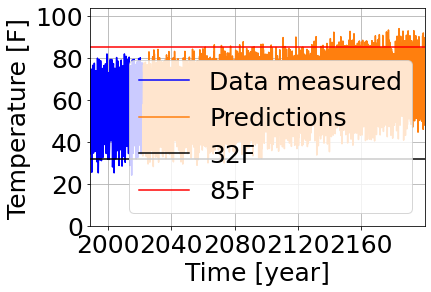

In [50]:

plt.plot(df_ny_new.index,df_ny_new['Value'],'b-',label = 'Data measured')
plt.plot(predi.index,y_pred,color='tab:orange', linestyle='-',label = 'Predictions')
plt.axhline(y=32, color='k', linestyle='-',label = '32F')
plt.axhline(y=85, color='red', linestyle='-',label = '85F')

plt.ylim(0)
plt.xlim(df_ny_new.index[-400],predi.index[2135])

plt.legend(fontsize = 25)





plt.xlabel('Time [year]',fontsize = 25)
plt.ylabel('Temperature [F]',fontsize = 25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.grid()
#plt.axhline(y=32, color='cyan', linestyle='-')
plt.savefig('NY_new',dpi=600,format='pdf')




In [51]:
df_la = pd.read_csv('LA_temp_noaa.csv',skiprows=4)
df_la['Date']= pd.to_datetime(df_la['Date'], format='%Y%m')
df_la.head(2)

,Date,Value,Anomaly
0,1944-08-01,68.0,-1.8
1,1944-09-01,66.9,-2.2


In [52]:
df_la['Date'] = pd.to_datetime(df_la['Date'])
df_la = df_la.set_index('Date')

In [53]:
df_la_new = df_la.drop(['Anomaly'], axis = 1)
df_la_new['Date2'] = df_la_new.index.to_julian_date()


In [54]:
df_la_new['sin(year)'] = np.sin(df_la_new['Date2'] / 12 * 2 * np.pi)
df_la_new['cos(year)'] = np.cos(df_la_new['Date2'] / 12 * 2 * np.pi)
df_la_new['sin(6mo)'] = np.sin(df_la_new['Date2'] / (6 ) * 2 * np.pi)
df_la_new['cos(6mo)'] = np.cos(df_la_new['Date2'] / (6 ) * 2 * np.pi)

In [55]:
X_train = df_la_new[:'2021'].drop(['Value'],axis = 1)
y_train = df_la_new.loc[:'2021', 'Value']

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
model = RandomForestRegressor()
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
regr = make_pipeline(PolynomialFeatures(2),LinearRegression())
#regr = LinearRegression()

#param_search = { 
#    'n_estimators': [20, 50, 100],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [i for i in range(5,15)]
#}
#tscv = TimeSeriesSplit(n_splits=10)
#gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
regr.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [57]:
predi = pd.to_datetime(expended_m_2['expended date'])
predi = pd.DataFrame(predi)
predi = predi.set_index('expended date')
predi['Date2'] = predi.index.to_julian_date()
predi['sin(year)'] = 1.25*np.sin(predi['Date2'] / 12 * 2 * np.pi)
predi['cos(year)'] = 1.25*np.cos(predi['Date2'] / 12 * 2 * np.pi)
predi['sin(6mo)'] = np.sin(predi['Date2'] / (6 ) * 2 * np.pi)
predi['cos(6mo)'] = np.cos(predi['Date2'] / (6 ) * 2 * np.pi)

In [58]:
y_true = y_test.values
y_pred = regr.predict(predi)
y_pred = np.random.normal(y_pred, 3.5)

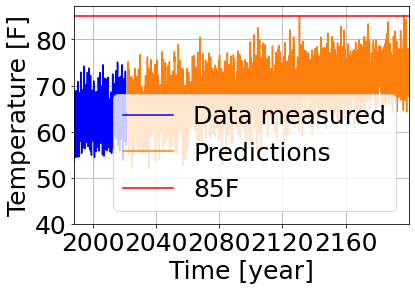

In [59]:
plt.plot(df_la_new.index,df_la_new['Value'],'b-', label='Data measured')
plt.plot(predi.index,y_pred,color='tab:orange', linestyle='-', label = 'Predictions')
#plt.axhline(y=32, color='blue', linestyle='-')
plt.axhline(y=85, color='red', linestyle='-', label = '85F')

plt.ylim(40)
plt.xlim(df_la_new.index[-400],predi.index[2135])


plt.xlabel('Time [year]',fontsize = 25)
plt.ylabel('Temperature [F]',fontsize = 25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize = 25)

#plt.axhline(y=32, color='cyan', linestyle='-')
plt.grid()
plt.savefig('LA_new',dpi=600,format='pdf')

